Dataset: [Water Potability](https://www.kaggle.com/datasets/adityakadiwal/water-potability)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.shape

(3276, 10)

In [5]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


# Dividimos el dataset en variables dependientes e independientes

In [6]:
X = df.iloc[:,0:9].values
X

array([[           nan, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [7]:
y = df.iloc[:,9].values
y

array([0, 0, 0, ..., 1, 1, 1])

# Imputación

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
X = imputer.fit_transform(X)
X

array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

# Estandarizar

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

# Dividimos los datos (train/test)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Implementamos la NN

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

**Arquitectura del modelo**

In [26]:
# Estilo modular
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()

    self.input = nn.Linear(9, 32)
    self.hidden = nn.Linear(32, 1)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.5)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.input(x)) #Primera capa con ReLU
    x = self.droput(x) # Aplicamos Dropout
    x = self.sigmoid(self.hidden(x)) #Capa final con Sigmoid (Clasificación Binaria)

In [28]:
# Estilo sequential
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
    self.model = nn.Sequential(
      nn.Linear(9, 32),
      nn.ReLU(),
      nn.Dropout(0.5),
      nn.Linear(32, 1),
      nn.Sigmoid(),
    )

  def forward(self, x):
    return self.model(x)

In [29]:
modelo = SimpleNN()
modelo

SimpleNN(
  (model): Sequential(
    (0): Linear(in_features=9, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=32, out_features=1, bias=True)
    (4): Sigmoid()
  )
)

**Funcion de pérdida (criterion) y Optimizador**

In [83]:
criterion = nn.BCELoss() # Binary Cross Entropy
optimizer = optim.RMSprop(modelo.parameters(), lr=0.001, weight_decay=0.01)

## Entrenamiento

**Tensores**

In [84]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_train_tensor.shape, y_train_tensor.shape

(torch.Size([2620, 9]), torch.Size([2620]))

In [85]:
epochs = 10
batch_size = 16
losses = []
accuracies = []

for epoch in range(epochs):
  modelo.train() # Pone el modelo en modo entrenamiento
  running_loss = 0.0
  correct = 0
  for i in range(0, len(X_train_tensor), batch_size):
    X_batch = X_train_tensor[i:i+batch_size]
    y_batch = y_train_tensor[i:i+batch_size].unsqueeze(1)
    # Forward
    outputs = modelo(X_batch)
    # Calcular la pérdida
    loss = criterion(outputs, y_batch)
    running_loss+=loss.item()
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # Calcular la pérdida media
  epoch_loss = running_loss/(len(X_train_tensor)/batch_size)
  losses.append(epoch_loss)
  # Evaluamos el modelo (accuracy)
  modelo.eval()
  with torch.no_grad():
    outputs = modelo(X_train_tensor)
    predicted = (outputs > 0.5).float()
    correct += (predicted.eq(y_train_tensor.unsqueeze(1))).sum().item()
  accuracy = correct / len(y_train_tensor)
  accuracies.append(accuracy)
  print(f"Epoch [{epoch + 1}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

Epoch [1], Loss: 0.6028, Accuracy: 69.31%
Epoch [2], Loss: 0.6048, Accuracy: 69.08%
Epoch [3], Loss: 0.6040, Accuracy: 69.08%
Epoch [4], Loss: 0.6054, Accuracy: 68.89%
Epoch [5], Loss: 0.6100, Accuracy: 69.01%
Epoch [6], Loss: 0.6074, Accuracy: 68.97%
Epoch [7], Loss: 0.6096, Accuracy: 68.82%
Epoch [8], Loss: 0.6098, Accuracy: 68.85%
Epoch [9], Loss: 0.6144, Accuracy: 68.74%
Epoch [10], Loss: 0.6086, Accuracy: 68.74%


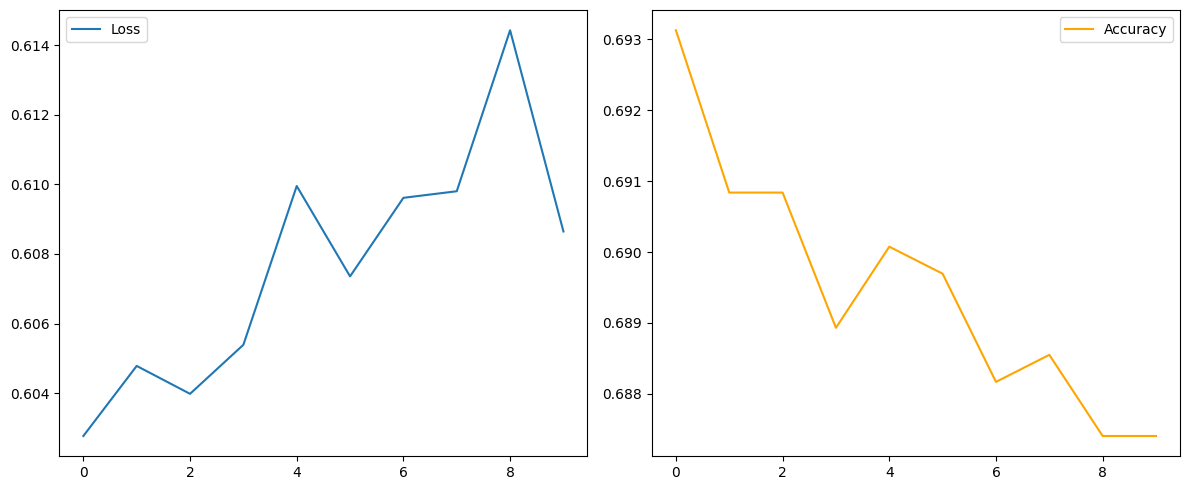

In [86]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(losses, label="Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(accuracies, label="Accuracy", color="orange")
plt.legend()

plt.tight_layout()
plt.show()

**Evaluamos el modelo**

In [88]:
modelo.eval()
with torch.no_grad():
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
  y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

  outputs = modelo(X_test_tensor)
  predicted = (outputs>0.5).float()
  correct = (predicted.eq(y_test_tensor)).sum().item()
  accuracy = correct / len(y_test_tensor)

print(f"El accuracy sobre los datos de prueba es {accuracy * 100:.2f}%")

El accuracy sobre los datos de prueba es 68.75%


**Matriz de confusión**

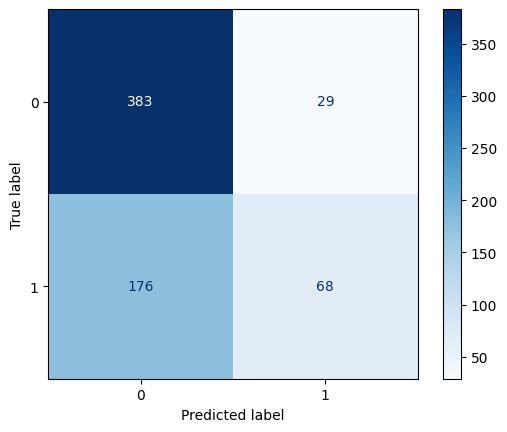

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

modelo.eval()
with torch.no_grad():
  # Convertimos los tensores a arrays para poderlos procesar con sklearn
  y_test_labels = y_test_tensor.numpy()
  predicted_labels = predicted.numpy()

  cm = confusion_matrix(y_test_labels, predicted_labels)

displ = ConfusionMatrixDisplay(confusion_matrix=cm)
displ.plot(cmap="Blues")
# displ.plot(cmap="YlOrBr")
plt.show()